## Curvefitting 3

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from IPython import display
import pandas as pd

In [2]:
random_seed=5
n_points=32
noise_level=0.2

In [3]:
def f(x): return 0.5*(x**2)

all_x = np.linspace(-2, 2, 128)
all_y = f(all_x)

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(random_seed) 
x=np.random.uniform(-2, 2, n_points)
y=f(x)+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

x_train_tensor = torch.FloatTensor(x_train).reshape(-1, 1)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
x_test_tensor = torch.FloatTensor(x_test).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

16 16


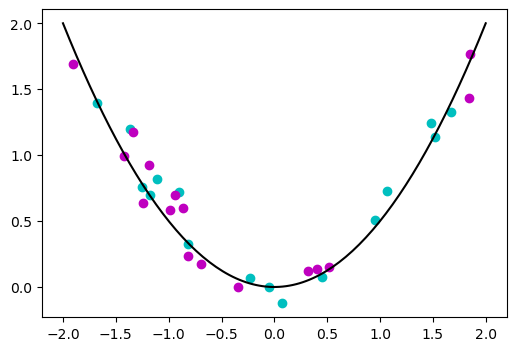

In [4]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
# plt.ylim([-0.5, 2])

In [5]:
# Define 2-layer ReLU network
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size=20):
        super(TwoLayerNet, self).__init__()
        self.layer1 = nn.Linear(1, hidden_size)  # Input to hidden
        self.layer2 = nn.Linear(hidden_size, 1)  # Hidden to output
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [6]:
def train_that_shit(hidden_units=4, num_epochs=100000, lr=1e-2, seed=5, checkpoints=5):
    
    torch.manual_seed(seed)
    train_losses=[]
    test_losses=[]
    
    model = TwoLayerNet(hidden_units)
    criterion = nn.MSELoss()
    # optimizer = optim.SGD(model.parameters(), lr=lr)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(num_epochs):
        outputs = model(x_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    
        if (epoch + 1) % (num_epochs/checkpoints) == 0:
            with torch.no_grad():
                test_outputs = model(x_test_tensor)
                test_loss = criterion(test_outputs, y_test_tensor)
            train_losses.append(train_loss.item())
            test_losses.append(test_loss.item())

    return train_losses, test_losses

In [7]:
hidden_units=[4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 18, 20, 22, 24, 32, 64, 128, 256, 512, 1024, 2048, 4096]
random_seeds=[5]

res=[]
for h in hidden_units:
    for random_seed in random_seeds:
        train_losses, test_losses=train_that_shit(hidden_units=h, num_epochs=100000, lr=1e-2, seed=random_seed, checkpoints=5)
        r={'hidden_units':h, 'torch_random_seed':random_seed, 'train_loss':train_losses[-1], 'test_loss':test_losses[-1], 'noise_level':noise_level}
        print(r)
        res.append(r)

{'hidden_units': 4, 'random_seed': 5, 'train_loss': 0.008375819772481918, 'test_loss': 0.022362610325217247}
{'hidden_units': 5, 'random_seed': 5, 'train_loss': 0.008333022706210613, 'test_loss': 0.020096220076084137}
{'hidden_units': 6, 'random_seed': 5, 'train_loss': 0.008226120844483376, 'test_loss': 0.019197724759578705}
{'hidden_units': 7, 'random_seed': 5, 'train_loss': 0.004202127456665039, 'test_loss': 0.021907219663262367}
{'hidden_units': 8, 'random_seed': 5, 'train_loss': 0.007689514197409153, 'test_loss': 0.023729341104626656}
{'hidden_units': 10, 'random_seed': 5, 'train_loss': 0.0010813090484589338, 'test_loss': 0.05072123929858208}
{'hidden_units': 12, 'random_seed': 5, 'train_loss': 0.007708653807640076, 'test_loss': 0.022663181647658348}
{'hidden_units': 14, 'random_seed': 5, 'train_loss': 0.007266851142048836, 'test_loss': 0.023701351135969162}
{'hidden_units': 15, 'random_seed': 5, 'train_loss': 0.0006223786040209234, 'test_loss': 0.05567014962434769}
{'hidden_units'

In [9]:
df=pd.DataFrame(res)

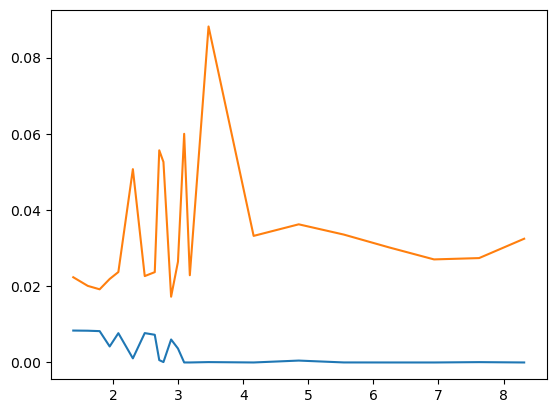

In [13]:
plt.plot(np.log(df['hidden_units']), df['train_loss'])
plt.plot(np.log(df['hidden_units']), df['test_loss'])